# регресиия

In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [32]:
from google.colab import files
file = files.upload()

Saving insurance.csv to insurance (1).csv


In [33]:
df = pd.read_csv("insurance.csv", sep=',')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
print(df.columns)
print(df.dtypes)
print( 'пустые значения', df.isna().sum()) #мы можем видеть, что пустых значений нет

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
пустые значения age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [35]:
print(df['sex'].unique())
print(df['smoker'].unique())
print(df['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [36]:
d={'female' : 0, 'male': 1}
sr={'yes': 0, 'no': 1}


df['sex']=df['sex'].map(d)
df['smoker']=df['smoker'].map(sr)
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,southwest,16884.92400
1,18,1,33.770,1,1,southeast,1725.55230
2,28,1,33.000,3,1,southeast,4449.46200
3,33,1,22.705,0,1,northwest,21984.47061
4,32,1,28.880,0,1,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,northwest,10600.54830
1334,18,0,31.920,0,1,northeast,2205.98080
1335,18,0,36.850,0,1,southeast,1629.83350
1336,21,0,25.800,0,1,southwest,2007.94500


In [37]:
# преобразуем целевую переменную из категориальной
# в прошлый раз мы делали это с помощью ручной замены

# Создадим модель кодировщика
label_encoder = preprocessing.LabelEncoder() 

# Обучение кодировщика: по сути тут создает словарь уникальных слов из переданного массива, 
# соотносит для каждого слова число (все что делали выше мы, только тут автоматизированно)
label_encoder.fit(df['region']) 

# на этом этапе по сути применяет полученный словарь в переданным данных (в данном случае мы передали столбец region)
df['region'] = label_encoder.transform(df['region']) 
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,3,16884.92400
1,18,1,33.770,1,1,2,1725.55230
2,28,1,33.000,3,1,2,4449.46200
3,33,1,22.705,0,1,1,21984.47061
4,32,1,28.880,0,1,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,1,10600.54830
1334,18,0,31.920,0,1,0,2205.98080
1335,18,0,36.850,0,1,2,1629.83350
1336,21,0,25.800,0,1,3,2007.94500


In [38]:
x=df[['sex', 'age', 'bmi', 'children', 'smoker', 'region']].values
y=df['charges'].values


In [39]:
features = pd.Series(['sex', 'age', 'bmi', 'children', 'smoker', 'region'])


# Создадим модель линейной регрессии
slr = LinearRegression()

# Применим линейную регрессию к нашему набору данных 
slr.fit(x, y)

# так как у нас много признаков, а не один как в предыдушем примере,
# то у нас будет много разных коэффицентов для каждого признака
# сохраним их все в датафрейм
coeff_df = pd.DataFrame(slr.coef_, columns=['Coefficient'])  
coeff_df['features'] = features

coeff_df

,Coefficient,features
0,-131.110580,sex
1,257.288075,age
2,332.570132,bmi
3,479.369394,children
4,-23820.434123,smoker
5,-353.640017,region


In [40]:
model = LinearRegression() 
# С помощью метода fit() применяем нашу модель к нашему набору данных - обучем модель
# С помощью .fit() вычисляются оптимальные значение весов w₀ и w₁ и т.д, 
# используя существующие вход и выход (x и y) в качестве аргументов. 
# Другими словами, .fit() совмещает модель.

model.fit(x, y)


LinearRegression()

In [41]:
y_pred = model.predict(x)
y_pred

array([25111.24186363,  3687.60517284,  6963.14570669, ...,
        4363.66236622,  1106.98661296, 37013.72809551])

In [42]:
print('MSE: {:.3f}'.format(mean_squared_error(y, y_pred)))

MSE: 36527659.886


In [43]:
print('slope:', model.coef_)
w0 = model.intercept_
print(w0)

slope: [  -131.11057962    257.28807486    332.57013224    479.36939355
 -23820.43412267   -353.64001656]
12004.98180144152


12004-131.1x1+257.2x2+332.5x3+479.3x4-23820.4x-353.6x5 восстановление линейное уравнение регрессии 

In [48]:
# Сделаем все тоже самое, но только возьмем один признак для построениея модели

# выделим вектор признака и вектор ответов
X = df[['smoker']].values
Y = df['charges'].values

# создадим модель линейной регрессии
slr = LinearRegression()

slr.fit(X, Y)

Y_pred = slr.predict(X)

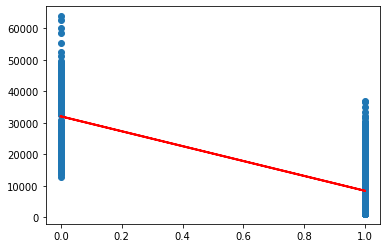

In [49]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red', linewidth=2)

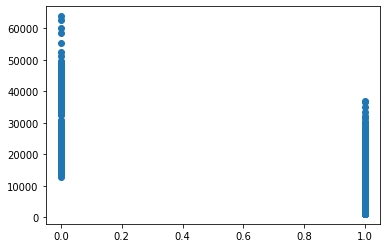

In [50]:
plt.scatter(X, Y)

In [51]:
print('MSE: {:.3f}'.format(mean_squared_error(Y, Y_pred)))

MSE: 55720715.954
